In [5]:
(x_train,y_train) , (x_test,y_test)= tf.keras.datasets.mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)

In [9]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [10]:
x_train /= 255 # x_train=x_train/255
x_test /=255

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

C:\Users\ELCOT\anaconda3\envs\aidata\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'] )
model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 39ms/step - accuracy: 0.8870 - loss: 0.3736
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 36ms/step - accuracy: 0.9721 - loss: 0.0904
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - accuracy: 0.9823 - loss: 0.0563
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 40ms/step - accuracy: 0.9866 - loss: 0.0427
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.9884 - loss: 0.0344
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.9912 - loss: 0.0256
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.9924 - loss: 0.0227
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 45ms/step - accuracy: 0.9929 - loss: 0.0214
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 45ms/step - accuracy: 0.9939 - loss: 0.0176
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 46ms/step - accuracy: 0.9939 - loss: 0.0179


In [13]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step


In [14]:
y_pred[0]

array([4.4526889e-09, 1.7151160e-10, 8.6331049e-09, 8.6159197e-08,
       1.2456296e-10, 3.9094270e-09, 1.8516560e-16, 9.9999964e-01,
       5.6631727e-10, 2.0974184e-07], dtype=float32)

In [17]:
import numpy as np
y_preds=np.argmax(y_pred,axis=1)

In [18]:
y_preds[0]

7

In [15]:
y_test[0]

7

In [19]:
from sklearn.metrics import confusion_matrix
con_mat=confusion_matrix(y_test,y_preds)
print(con_mat)

[[ 972    0    2    0    0    2    3    1    0    0]
 [   0 1125    1    3    0    1    1    3    1    0]
 [   1    2 1010    6    1    0    1    5    6    0]
 [   0    0    1 1003    0    4    0    2    0    0]
 [   1    0    2    1  957    0    5    0    1   15]
 [   1    0    1    7    0  882    1    0    0    0]
 [   5    2    0    1    3    9  938    0    0    0]
 [   1    0    9    1    0    0    0 1015    0    2]
 [   3    0    0    7    0    7    0    5  948    4]
 [   1    0    0    5    5    7    0    4    0  987]]


C:\Users\ELCOT\AppData\Local\Temp\ipykernel_7872\3719199659.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


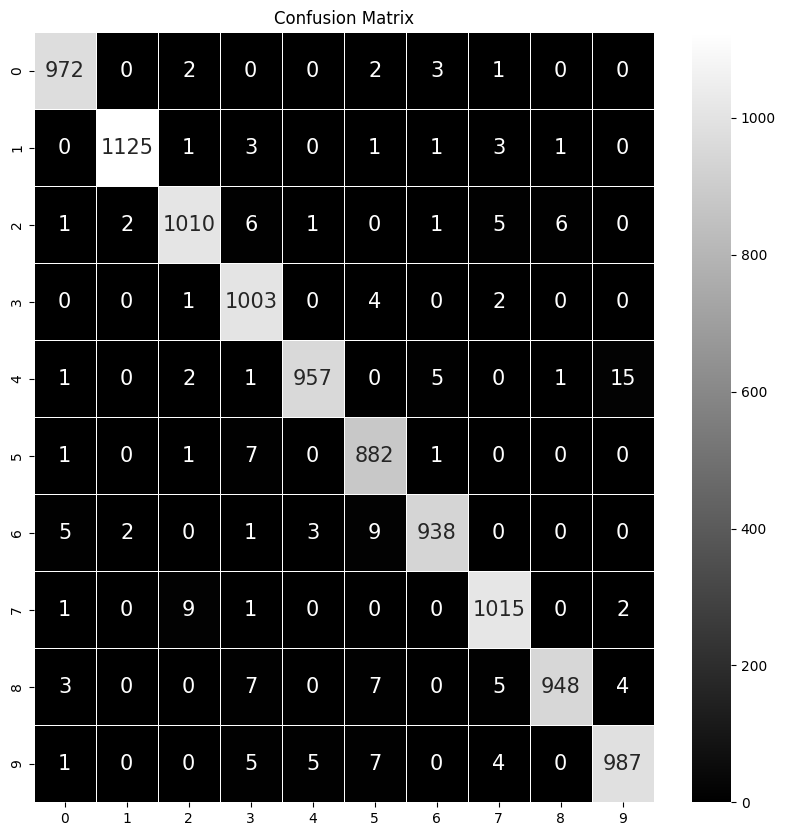

In [29]:
con_mat=confusion_matrix(y_test,y_preds)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('Confusion Matrix')
plt.show()

In [30]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9797 - loss: 0.0944


[0.07402750849723816, 0.9836999773979187]

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
6


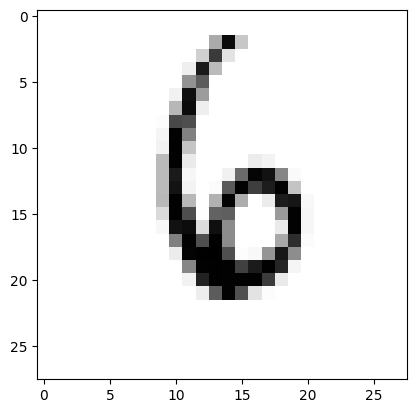

In [32]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())